# K-Means Algorithim and Principal Component Analysis

#### AI Saturday Lagos Begineers Class (Instructors: `Tejumade Afonja`, `Kenechi Dukor`)
This exercise is adopted from [Andrew Ng Machine Learning Course](https://www.coursera.org/learn/machine-learning)

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import linalg

## K-Means Alogrithim

### Implementing K-Means from Scratch

### Loading Data

In [3]:
X = loadmat('data/ex7data2.mat')['X']

In [4]:
X.shape

(300, 2)

In [6]:
# print(X)

### Data Visualization

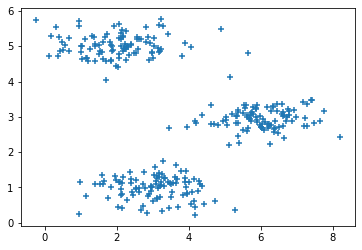

In [7]:
plt.scatter(X[:,0],X[:,1], marker='+')

### Define Function to Implement K-Means

In [22]:
'''
X : examples
k : no of clusters/centroids
x : centroids
'''
def initialize_centroid(X, k):
    '''
    initialize k centroids
    '''
    i = np.random.choice(X.shape[0], k) # This will return k random index positions on the dataset
    x = X[i] # we set the three random positions to be the centroids
    return x

def plot_centroid(X, x):
    '''
    scatter plot of centroids and examples
    
    '''
    plt.scatter(X[:,0],X[:,1], marker='+')
    plt.scatter(x[:,0],x[:,1], color='r')
    
def get_closer_exam(X,x):
    '''
    Obtain examples that are closer to each centroid
    '''
    c = []
    for i in range(X.shape[0]):
        pos = np.argmin(np.sqrt(np.sum((X[i] - x)**2, axis=1))) # argmin returns the position of the smallest value in the array
        c.append(pos)
    return c
        
def move_cent(X, c):
    '''
    move the centroids position closer to its clustering examples
    '''
    for i in range(3):
        x[i] = (1.0/X[np.array(c) == i].shape[0])*np.sum(X[np.array(c) == i], axis = 0)
    return x

def plt_cluster(X, x, c):
    '''
    plot all clusters
    '''
    for i in range(3):
        plt.scatter(X[np.array(c)==i][:,0], X[np.array(c)==i][:,1], marker='+')
        plt.scatter(x[:,0],x[:,1], color='r')

def distortion(X, x, c):
    '''
    A measure of how well the clusters are formed
    '''
    distances = []
    for i in range(x.shape[0]):
        dis = (1.0/X[np.array(c) == i].shape[0])*np.sum(np.sqrt(np.sum((X[np.array(c) == i]-x[i])**2, axis=1)))
        distances.append(dis)
    
    return distances, (1.0/len(distances))*np.sum(np.array(distances))

### Traning / Test

initialize centroids positions

In [23]:
x = initialize_centroid(X,3)
x

array([[6.40773863, 2.67554951],
       [3.56478625, 1.11764714],
       [2.66046572, 5.19623848]])

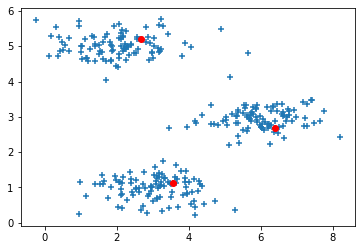

In [24]:
plot_centroid(X, x)

find examples closer to each centroid

In [25]:
c = get_closer_exam(X, x)
len(c)

300

move each centroid position based on it clusters

In [26]:
x = move_cent(X, c)

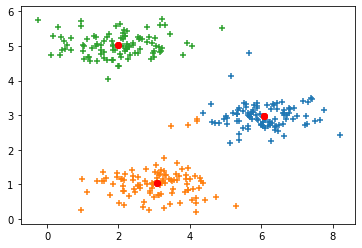

In [27]:
plt_cluster(X, x,  c)

obtain the distortion

In [28]:
dists, dist = distortion(X,x,c)

In [29]:
dist

0.7947772960023751

This steps are usually performed iteratively

In [48]:
k = 3
x = initialize_centroid(X, k)
distorts = []
for i in range(20):
    c = get_closer_exam(X, x)
    _, dist = distortion(X, x, c)
    distorts.append(dist)
    x = move_cent(X, c)

In [49]:
distorts

[1.5705678294733856,
 1.3593316054130447,
 1.4156781072138822,
 1.573995181838311,
 1.4796926721815429,
 0.9884275649189403,
 0.8058465682821272,
 0.7943806559341917,
 0.7942678193768536,
 0.7942678193768536,
 0.7942678193768536,
 0.7942678193768536,
 0.7942678193768536,
 0.7942678193768536,
 0.7942678193768536,
 0.7942678193768536,
 0.7942678193768536,
 0.7942678193768536,
 0.7942678193768536,
 0.7942678193768536]

plot of distortion at each iteration step

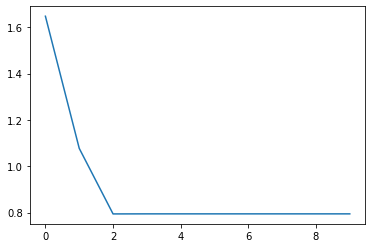

In [23]:
plt.plot(range(len(distorts)), distorts)

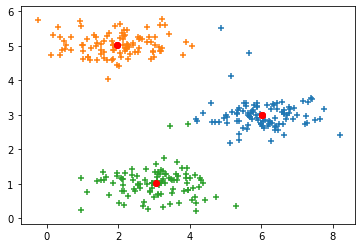

In [50]:
plt_cluster(X,x,c)

### Faster

In [54]:
data1 = loadmat('data/ex7data2.mat')

In [55]:
X1 = data1['X']
print('X1:', X1.shape)

X1: (300, 2)


In [56]:
km1 = KMeans(3)
km1.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [57]:
km1.cluster_centers_

array([[1.95399466, 5.02557006],
       [6.03366736, 3.00052511],
       [3.04367119, 1.01541041]])

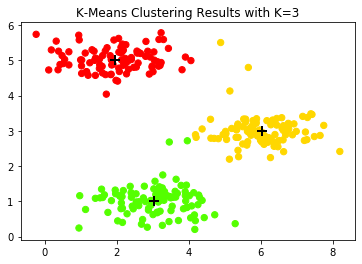

In [58]:
plt.scatter(X1[:,0], X1[:,1], s=40, c=km1.labels_, cmap=plt.cm.prism) 
plt.title('K-Means Clustering Results with K=3')
plt.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);

#### Image compression with K-means

In [59]:
img = plt.imread('data/bird_small.png')
img_shape = img.shape
img_shape

(128, 128, 3)

In [63]:
A = img/255

In [64]:
AA = A.reshape(128*128,3)
AA.shape

(16384, 3)

In [81]:
km2 = KMeans(100)
km2.fit(AA)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=100, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [82]:
km2.cluster_centers_

array([[0.00288164, 0.00271685, 0.00224545],
       [0.00079385, 0.00079888, 0.00080992],
       [0.00210019, 0.00182581, 0.00180148],
       [0.00388676, 0.00386479, 0.00330521],
       [0.00045083, 0.00048475, 0.00044652],
       [0.00306524, 0.00250917, 0.00142825],
       [0.00168779, 0.00120648, 0.00115757],
       [0.00350945, 0.00319652, 0.00224287],
       [0.00215633, 0.00149796, 0.00053269],
       [0.00301632, 0.00221803, 0.000612  ],
       [0.00138273, 0.00165027, 0.00256349],
       [0.00211628, 0.00292836, 0.00365458],
       [0.00339683, 0.00322976, 0.00324188],
       [0.00358246, 0.00306584, 0.0014615 ],
       [0.00316901, 0.00241138, 0.00114567],
       [0.0027047 , 0.00209368, 0.00104874],
       [0.00134282, 0.00090581, 0.00068909],
       [0.00319984, 0.002932  , 0.00237167],
       [0.00379063, 0.00248431, 0.00127456],
       [0.00022972, 0.00025169, 0.00021312],
       [0.00170704, 0.00199252, 0.00276062],
       [0.00257337, 0.00227826, 0.00229259],
       [0.

In [83]:
km2.labels_

array([40, 91, 40, ..., 90, 97, 97], dtype=int32)

In [84]:
B = km2.cluster_centers_[km2.labels_].reshape(img_shape[0], img_shape[1], 3)

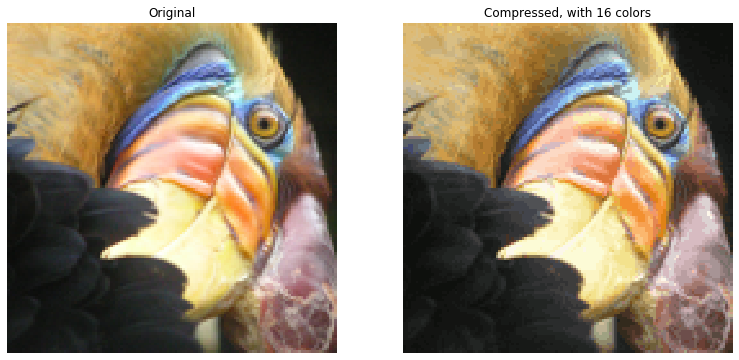

In [85]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,9))
ax1.imshow(img)
ax1.set_title('Original')
ax2.imshow(B*255)
ax2.set_title('Compressed, with 16 colors')

for ax in fig.axes:
    ax.axis('off')

### PCA on example data set

Using scipy instead of scikit-learn

In [86]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn import neighbors, datasets

import pylab as pl

seaborn.set()

iris = datasets.load_iris()

X, y = iris.data, iris.target
from sklearn.decomposition import PCA

Attribute Information:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica

In [87]:
X.shape

(150, 4)

Reduced dataset shape: (150, 2)


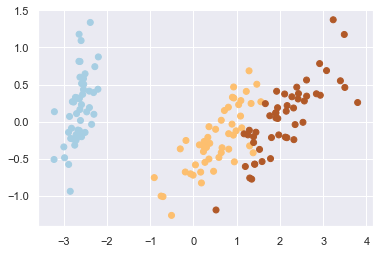

In [88]:
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap='Paired')

In [1]:
# pca.components_

In [ ]:
# print("Meaning of the 2 components:")
# for component in pca.components_:
#     print(" + ".join("%.3f x %s" % (value, name)
#                      for value, name in zip(component,
#                                             iris.feature_names)))